##Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

##Loading Data

In [ ]:
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Data Visualization

In [ ]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
iris.groupby(['Species']).mean().T

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Id,25.500,75.500,125.500
SepalLengthCm,5.006,5.936,6.588
SepalWidthCm,3.418,2.770,2.974
PetalLengthCm,1.464,4.260,5.552
PetalWidthCm,0.244,1.326,2.026


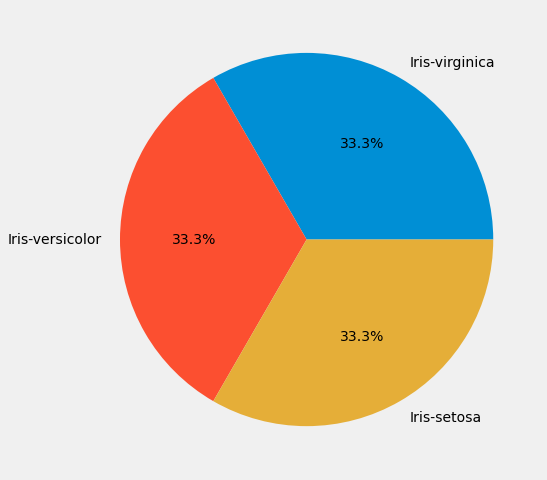

In [ ]:
plt.figure(figsize=(16,8))
labels=['Iris-virginica','Iris-versicolor','Iris-setosa']
plt.pie(iris['Species'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()

<Figure size 1152x576 with 0 Axes>

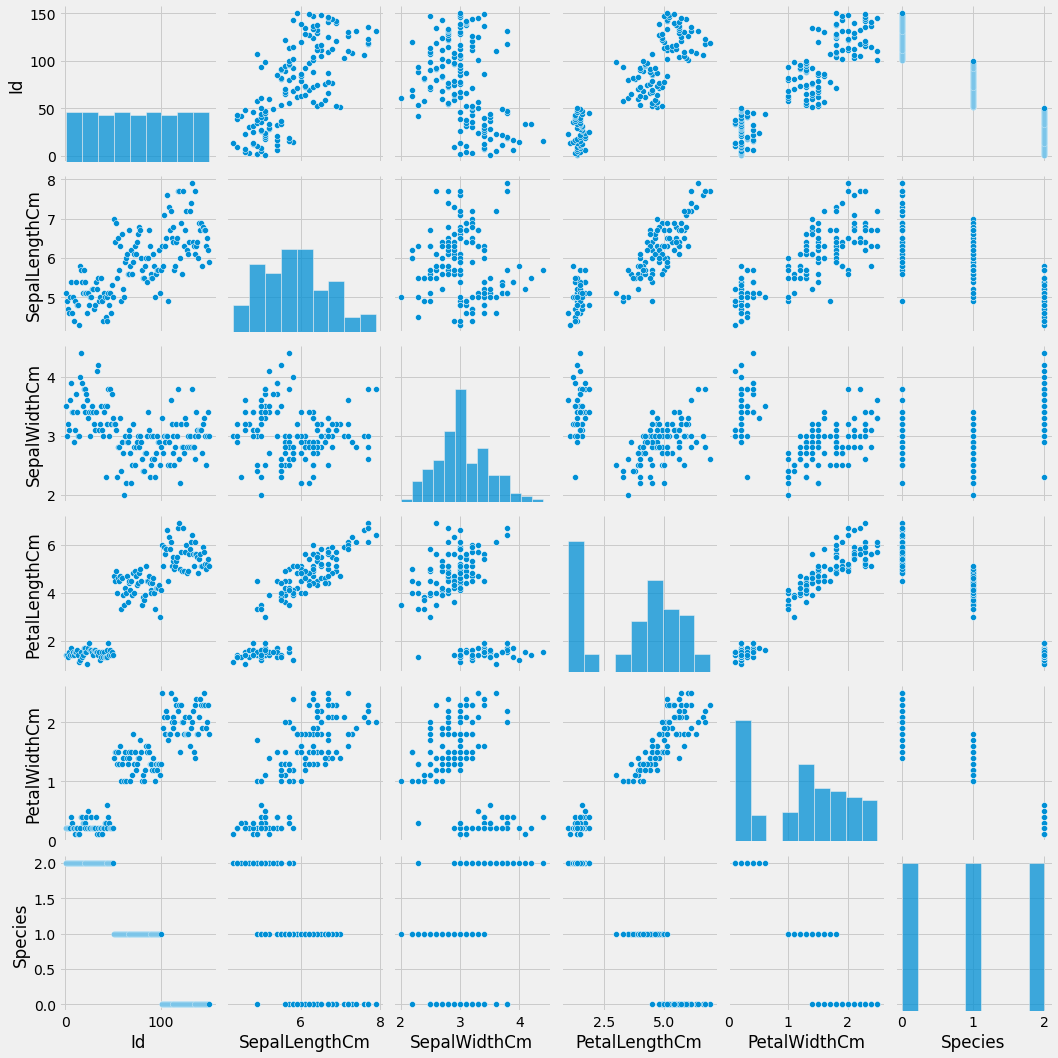

In [ ]:
##Distrubtion of data
plt.figure(figsize=(16,8))
sns.pairplot(iris)


Text(0, 0.5, 'SepalLenghtCm')

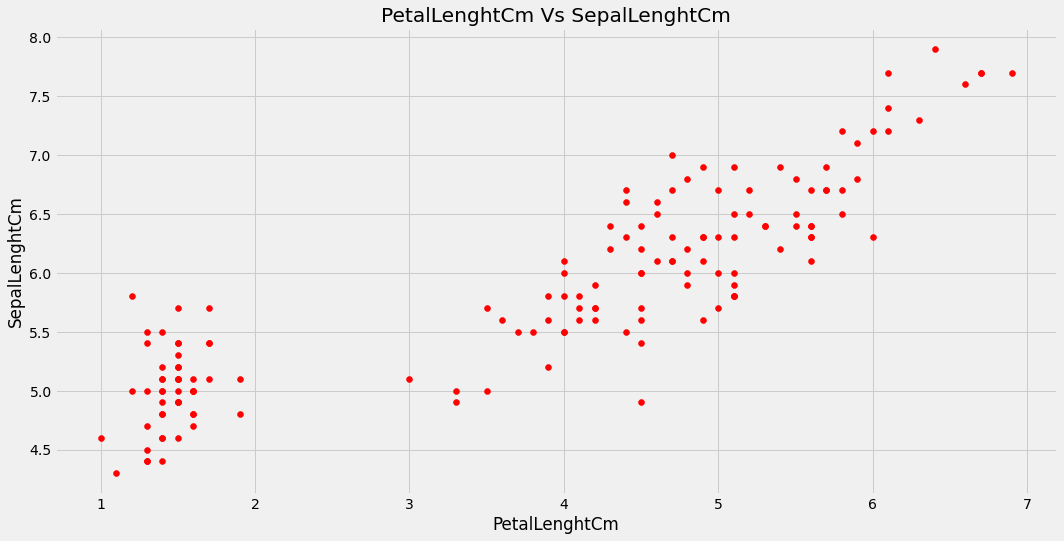

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(iris.PetalLengthCm,iris.SepalLengthCm,c='r')
plt.title('PetalLenghtCm Vs SepalLenghtCm')
plt.xlabel('PetalLenghtCm')
plt.ylabel('SepalLenghtCm')

Text(0, 0.5, 'SepalWidhtCm')

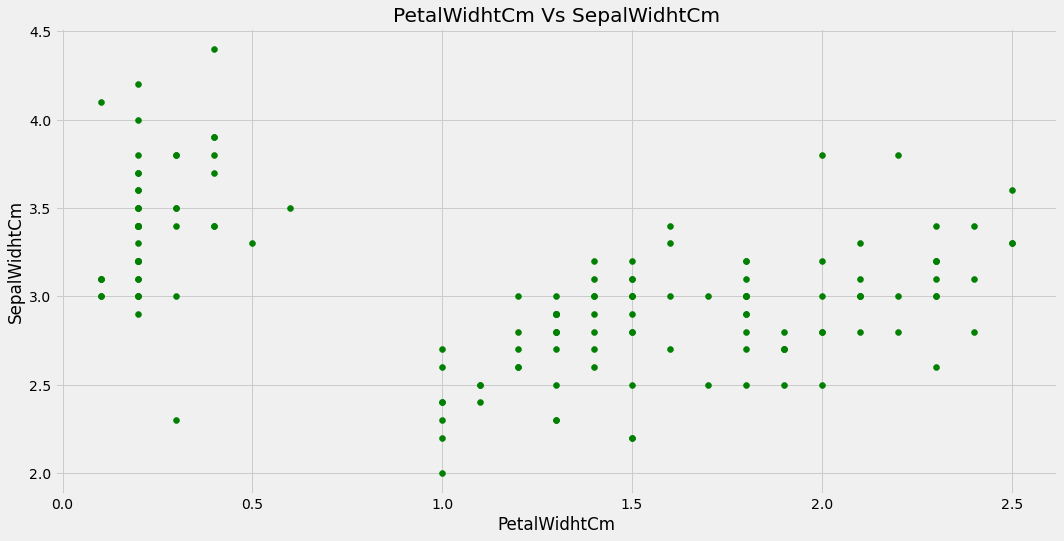

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(iris.PetalWidthCm,iris.SepalWidthCm,c='g')
plt.title('PetalWidhtCm Vs SepalWidhtCm')
plt.xlabel('PetalWidhtCm')
plt.ylabel('SepalWidhtCm')

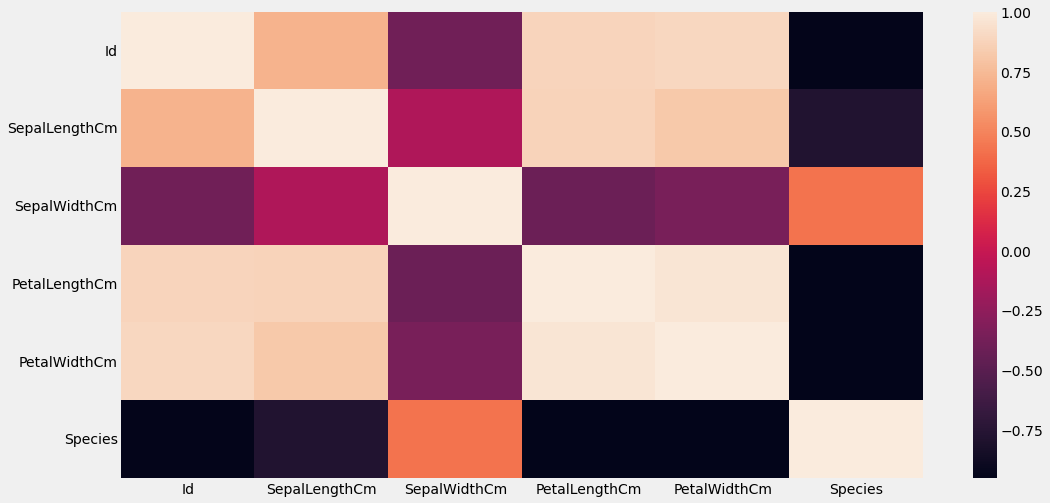

In [ ]:
##Correlation
plt.figure(figsize=(16,8))
sns.heatmap(iris.corr())

##Data Preprocessing

In [ ]:
d={'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2}
iris['Species']=iris['Species'].map(d)

In [ ]:
X=iris.drop(['Species','Id'],axis=1)
Y=iris['Species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=16)

##Model Building

In [ ]:
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

##Model evaluation

In [ ]:
y_prediction=d_tree.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_prediction)

0.9

In [ ]:
from sklearn import tree

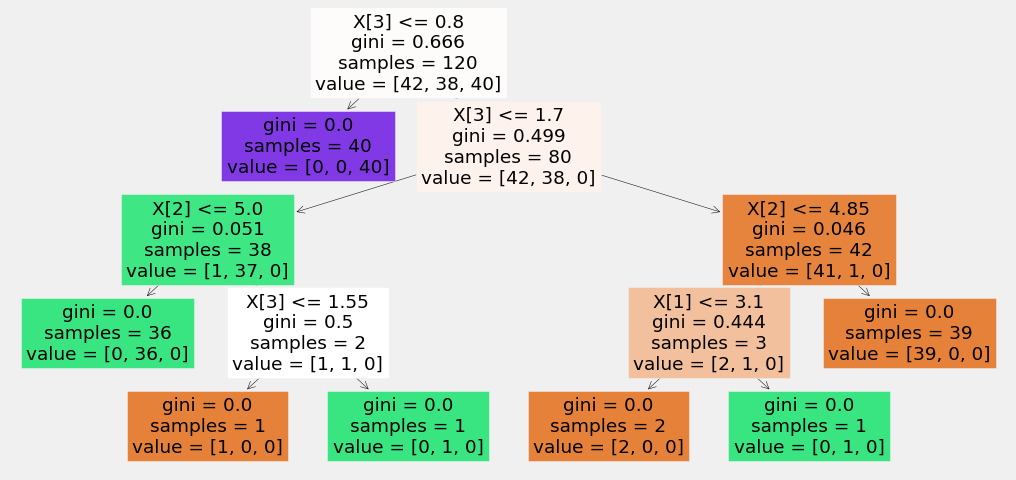

In [ ]:
plt.figure(figsize=(16,8))
tree.plot_tree(d_tree,filled=True)
plt.show()